### Analyse en Composantes Principales (ACP)

Manipulations de base

In [1]:
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dict = {'X1': [1, 2, 3, 4, 5, 6, 7, 9],
        'X2': [2, 3, 2, 4, 4, 7, 6, 7]}
X = pa.DataFrame(data=dict)
X.head()

,X1,X2
0,1,2
1,2,3
2,3,2
3,4,4
4,5,4


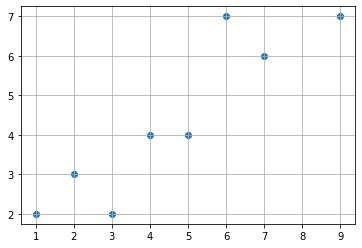

In [3]:
plt.grid()
plt.scatter(X['X1'], X['X2'])

#### ACP "à la main"

X1    4.625
X2    4.375
dtype: float64


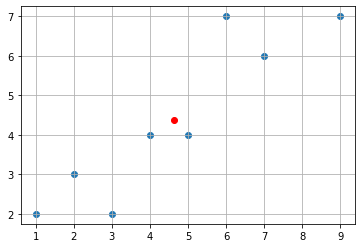

In [4]:
mean = X.mean()
print(mean)
plt.grid()
plt.scatter(X['X1'], X['X2'])
plt.scatter(mean[0], mean[1], c='r')

In [5]:
Z = X - mean
print(Z)

      X1     X2
0 -3.625 -2.375
1 -2.625 -1.375
2 -1.625 -2.375
3 -0.625 -0.375
4  0.375 -0.375
5  1.375  2.625
6  2.375  1.625
7  4.375  2.625


In [6]:
S = len(X) * X.cov()
print(S)

           X1         X2
X1  57.000000  40.142857
X2  40.142857  34.142857


In [7]:
from numpy.linalg import eig

In [8]:
lambdas, vect = eig(S)
print(lambdas)
print(vect)

[87.30943553  3.83342162]
[[ 0.79806544 -0.60257079]
 [ 0.60257079  0.79806544]]


In [9]:
e1 = vect[:,0]
e2 = vect[:,1]
print('e1: ', e1)
print('e2: ', e2)

e1:  [0.79806544 0.60257079]
e2:  [-0.60257079  0.79806544]


In [10]:
print(e1.T.shape)
print(Z.T.shape)
Y = np.dot(e1.T, Z.T)
print(Y)

(2,)
(2, 8)
[-4.32409284 -2.92345661 -2.72796196 -0.72475495  0.0733105   2.6790883
  2.87458295  5.07328462]


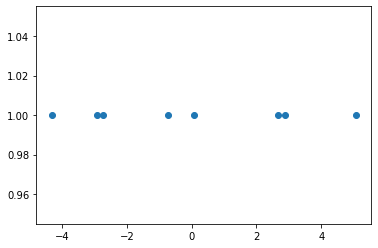

In [11]:
plt.scatter(Y, np.ones(len(Y)))
#origin = np.dot(e1.T, mean.T)
#print(origin)
#plt.scatter(origin, 1)

#### ACP avec <code>sklearn</code>

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(Z)

PCA(n_components=1)

In [13]:
Y = pca.transform(Z)

In [14]:
print(Y.T)

[[-4.32409284 -2.92345661 -2.72796196 -0.72475495  0.0733105   2.6790883
   2.87458295  5.07328462]]
